In [1]:
import os
import pandas as pd
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#import csv file
csv_path = '../data/arcan-2-develop-none.csv'

#show head of df
df = pd.read_csv(csv_path)
df.head()

,parent_sha,child_sha,old_file,new_file,old_lines,new_lines,old_author,new_author,when
0,7189ba7f513bced49b18dd95172b43e3c67822f9,9985d9028f11e200dcb3fe402eb73d343ee92209,arcan-2/pom.xml,arcan-2/pom.xml,0,106,Ilaria Pigazzini,Darius Sas,2019-09-25 09:17:20 UTC
1,7189ba7f513bced49b18dd95172b43e3c67822f9,9985d9028f11e200dcb3fe402eb73d343ee92209,arcan-2/src/main/java/com/arcan/Main.java,arcan-2/src/main/java/com/arcan/Main.java,0,7,Ilaria Pigazzini,Darius Sas,2019-09-25 09:17:20 UTC
2,7189ba7f513bced49b18dd95172b43e3c67822f9,9985d9028f11e200dcb3fe402eb73d343ee92209,arcan-2/src/test/java/com/arcan/MainTest.java,arcan-2/src/test/java/com/arcan/MainTest.java,0,13,Ilaria Pigazzini,Darius Sas,2019-09-25 09:17:20 UTC
3,9985d9028f11e200dcb3fe402eb73d343ee92209,f877c6438cfcf18a8e06d33de95e14e113400131,arcan-2/pom.xml,arcan-2/pom.xml,0,12,Darius Sas,Darius Sas,2019-09-27 14:06:24 UTC
4,9985d9028f11e200dcb3fe402eb73d343ee92209,f877c6438cfcf18a8e06d33de95e14e113400131,arcan-2/src/main/java/com/arcan/data/graphs/de...,arcan-2/src/main/java/com/arcan/data/graphs/de...,0,17,Darius Sas,Darius Sas,2019-09-27 14:06:24 UTC


In [3]:
###SHOW SOME STATISTICS
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Are there any null values: {df.isnull().values.any()}\n")

unique_values = dict(df.nunique())
for key in unique_values.keys(): print(f"Unique {key}: {unique_values[key]}")

print(f"\nFiles re-named with a commit: {len(df[df['old_file'] != df['new_file']])}")

Total rows: 43160
Total columns: 9
Are there any null values: False

Unique parent_sha: 1779
Unique child_sha: 1779
Unique old_file: 3835
Unique new_file: 3835
Unique old_lines: 430
Unique new_lines: 433
Unique old_author: 8
Unique new_author: 8
Unique when: 1770

Files re-named with a commit: 0


In [4]:
##DROP usless columns
df = df.drop(['new_file', 'old_lines', 'new_lines', 'old_lines', 'old_author','when'], axis=1)

In [5]:
#Group files that changed with the same commit and the commit author
df_selected = df.groupby(['parent_sha','child_sha'], group_keys=False, as_index=False).agg({'old_file': list, 'new_author': 'first'})

In [6]:
df_selected

,parent_sha,child_sha,old_file,new_author
0,00117552ddef1a12866a67a83e759e68ca41428d,678b25ae45dfa7dfab3d2de0f68ac355fd3e9ee7,"[arcan-2/arcan-core/pom.xml, arcan-2/arcan-cor...",Darius
1,005600f8e3d0aec24bb92ec88ada1df550cb994e,6485d133ad7b2ce8b9135cc1b7334b9b1bfaa614,[arcan-2/src/main/java/com/arcan/SpringMain.ja...,Darius Sas
2,00599a731d5e665ec136e4889abeb76bdc8a46b0,cffd4ae52f2068fcb68d10c3f556ca26edf6e5f4,[arcan-2/arcan-core/src/main/java/com/arcan/pa...,Darius
3,00c35d5b071abcba3d1faadaf675f71eb01e9c6f,13f6663ec37a77f073ee73ef2dd1754f90150104,[arcan-2/arcan-core/src/test/java/com/arcan/da...,Darius Sas
4,00f4d537a2a8dbb78d70f181945f08fcd5dc6e9c,a5cb3b5d5c97066e001915d2d7535f358e199c28,"[arcan-2/arcan-core/pom.xml, arcan-2/arcan-cor...",Darius
...,...,...,...,...
1774,fef84192d7a8499462d5d4f5ec3c66c2284583bb,e8ecae209fa43943e4e36175476c6c724a2a11ab,[arcan-2/arcan-server/executable/arcan-server....,Darius Sas
1775,ff2a133ff8b2fad7af018cc8ee8a6384c3162163,20c5390cd770cc3d9e1ed6696fa675fd0acece10,"[arcan-2/arcan-cli/pom.xml, arcan-2/arcan-cli/...",Darius
1776,ff5479369df08a1cdff1b92c7f14dd7cafc2fbf0,2a3ead2319546e1c305f6dc5f83f5713fc24f740,[arcan-2/src/main/java/com/arcan/ArcanMain.jav...,Darius Sas
1777,ff8e666cecd3c1f5d0eb56427d9d316100be06e4,839cfec7855666333653df07323bf7803bcca7c0,[arcan-2/.github/workflows/develop.yml],Alessandro Tundo


In [7]:
##DROP now parent_sha and child_sha columns
df_selected = df_selected.drop(['parent_sha', 'child_sha'], axis=1)

In [8]:
df_selected

,old_file,new_author
0,"[arcan-2/arcan-core/pom.xml, arcan-2/arcan-cor...",Darius
1,[arcan-2/src/main/java/com/arcan/SpringMain.ja...,Darius Sas
2,[arcan-2/arcan-core/src/main/java/com/arcan/pa...,Darius
3,[arcan-2/arcan-core/src/test/java/com/arcan/da...,Darius Sas
4,"[arcan-2/arcan-core/pom.xml, arcan-2/arcan-cor...",Darius
...,...,...
1774,[arcan-2/arcan-server/executable/arcan-server....,Darius Sas
1775,"[arcan-2/arcan-cli/pom.xml, arcan-2/arcan-cli/...",Darius
1776,[arcan-2/src/main/java/com/arcan/ArcanMain.jav...,Darius Sas
1777,[arcan-2/.github/workflows/develop.yml],Alessandro Tundo


Num files: 3835
Max number of files mod per commit: 1088
Min number of files mod per commit: 1


 HOW MANY TIMES TWO FILES HAVE BEEN MOD TOGETHER


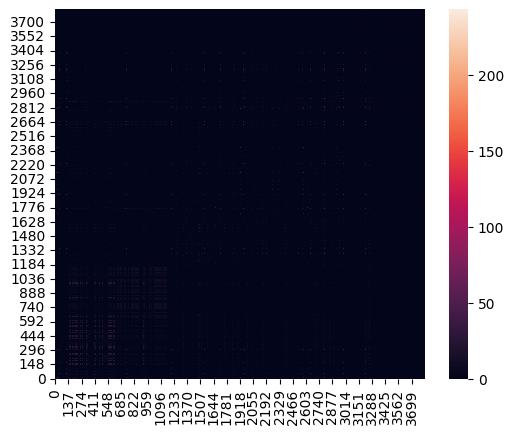

In [9]:
#get unique filepath
unique_filepath = sorted(list(set(df['old_file'])), key=lambda x: len(x.split('/')))
num_filepath = len(unique_filepath)
print(f"Num files: {num_filepath}")

id_to_file = {file: index for index,file in enumerate(unique_filepath)}
corr_count = np.zeros([len(unique_filepath), len(unique_filepath)], dtype=int)

#compute how many times a file has been modified in the same commit of another
instances = df_selected['old_file'].tolist()
print(f"Max number of files mod per commit: {max([len(x) for x in instances])}")
print(f"Min number of files mod per commit: {min([len(x) for x in instances])}")

for filepath in id_to_file:
    row = id_to_file[filepath]
    for instance in instances:
        if filepath in instance:
            for elem in instance:
                col = id_to_file[elem]
                corr_count[row,col] += 1



print(f"\n\n HOW MANY TIMES TWO FILES HAVE BEEN MOD TOGETHER")
sns.heatmap(corr_count.T, square=True)
plt.xlim(0, corr_count.shape[0])
plt.ylim(0, corr_count.shape[1])
plt.show()  


Author file names: ['Alessandro Tundo', 'Darius', 'Darius Daniel Sas', 'Darius Sas', 'Ilaria Pigazzini', 'Luca', 'Luca Belluzzi', 'LucaArcan']


 HOW MANY TIMES AN AUTHOR CHANGE A FILE


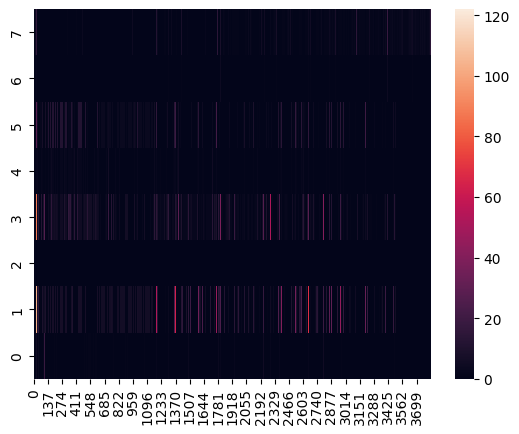

In [10]:
#get unique author name
unique_authorname = sorted(list(set(df['new_author'])))
print(f"Author file names: {unique_authorname}")

authorname_for_instance = df_selected['new_author'].tolist()

corr_count = np.zeros([len(unique_filepath), len(unique_authorname)], dtype=int)

for index, author in enumerate(authorname_for_instance):
    col = unique_authorname.index(author)
    for elem in instances[index]:
        row = id_to_file[elem]
        corr_count[row,col] += 1


print(f"\n\n HOW MANY TIMES AN AUTHOR CHANGE A FILE")
sns.heatmap(corr_count.T)
plt.xlim(0, corr_count.shape[0])
plt.ylim(0, corr_count.shape[1])
plt.show()

                                                

In [11]:
#compute max and min depth filepath 
#file_depth = [len(file.split('/')) for file in unique_filepath]
#unique_filepath_split = [file.split('/') for file in unique_filepath]
#print(f"Max file depth: {max(file_depth)}")
#print(f"Min file depth: {min(file_depth)}")


#since the root dir is equal for every file (arcan-2/) it can be the removed --- no information
#for each level associate an id to each of the dirs/files at that level
#id_per_level = {}
#for i in range(0,max(file_depth)):
#    index = 1
#    level = {}
#    for filepath_split in unique_filepath_split:
#        if len(filepath_split) >= i+1:
#            if filepath_split[i] not in level.keys():
#                level[filepath_split[i]] = index
#                index += 1
#            else: continue
#        else: continue
#    id_per_level['level_'+str(i)] = level

#Map each filepath as vector of 13 dimensions